## The following work is the second part of the machine learning effort. 
It aims at answering the following questions:
#### 1. Does feature scaling make the prediction results better?
Short answer is No. For both logistic regression and random forest, a slight Log Loss increase was observed with feature scaling. For logistic regression, feature scaling make the Log Loss from the training and validation data more consistent. Feature scaling has negligible effect on the predicted feature importance from random forest classifier.

This result is surprising that in most cases (esp in neural network or PCA) feature scaling improves the performance of the ML algorithms. However, preprocessing in machine learning is somewhat a very black art and itt depends heavily on the method you use and also on the problem domain.


#### 2. The distribution of price is highly skewed. Does logarithmic transformation help improve the prediction results?
For both logistic regression and random forest, a slight Log Loss increase was observed with price being replaced by Log(price).
#### 3. How do you handle multicolinearity in the data?

Considering multicollineariy is important in regression analysis because it can mess with your coefficient estimates; small changes in the data used for estimation may cause wild swings in estimated coefficients. Ridge regression (which is a regularization method) is commonly recommended as a tool for dealing with colinearity. Unlike some penalization methods, it does not put any coefficients to 0 and it shrinks larger coeffiicients by more than small ones (in absolute value).

Machine Learning techniques focus on predictive accuracy, all we care about is how we can use a set of variables to predict another set. We don't care about the impact these variables have on each other. For example, you can imagine that multicollinearity in random forests won’t have any effect on prediction Log Loss or accuracy. If variables are highly correlated, you can simply choose one or the other during the tree split process.

#### 4. Can we use feature selection method (PCA, forward feature selection, backward feature selection) to speed up the prediction while maintain high accuracy?
Ideally yes. But this is not implemented in this work. The goal of this project is to achieve the lowest Log Loss and speed is not the top concern. Besides, PCA may filter out some important information and decrease the prediction capability of our ML models.

#### 5. The three classes of interest level is highly unbalanced. How do you handle it in machine learning?
See this link for answer: https://www.quora.com/In-classification-how-do-you-handle-an-unbalanced-training-set
In this specific problem, we use Log Loss instead of classification accuray to evaluate the performance of the ML models.

#### 6. How do you prevent overfitting?
Regularization and cross validation. Regularization is implemented in scikit learn. I hold back 30% of the training data and use it for validating the performance of the data.

I will focus on ***logistic regression and random forest algorithm*** because logistic regression is the simplist classification algorithm and random forest usually performs well.

In [20]:
import random
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sub = pd.DataFrame()
sub["listing_id"] = pd.read_json('test.json')["listing_id"]

### 1. Feature scaling

#### Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
train_df = pd.read_json('FE6_train.json')
test_df = pd.read_json('FE6_test.json')
y = train_df['interest_level']  # 0, 1, 2 three classes
train_df = train_df.drop(['interest_level'], axis = 1)
combined = train_df.append(test_df)

Normalize both the train and test data.

In [9]:
combined = combined.apply(lambda x: (x-x.mean())/x.std(), axis=0)

Split the training data into train/validation data.

In [14]:
validation_size = 0.30
seed = 2018
x = train_df.values
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size = validation_size, random_state = seed)

Use GridSearch to find the best model

In [19]:
params = {'penalty':['l1', 'l2'], 'C': [1, 10], 'max_iter': [50, 100]}
lr = LogisticRegression(fit_intercept = True, random_state = seed)
clf = GridSearchCV(lr, params, scoring = 'neg_log_loss')
result = clf.fit(X_train, Y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning:

In [24]:
# output best prediction accuracy and best lr model parameters
print("BestL %f using %s" % (- result.best_score_, result.best_params_))

BestL 0.615051 using {'penalty': 'l1', 'max_iter': 50, 'C': 10}


This logloss is smaller than 0.722362 using {'C': 1, 'penalty': 'l1', 'max_iter': 100} without feature scaling.

Log Loss score

In [23]:
clf = LogisticRegression(penalty = 'l1', max_iter = 50, C = 10, fit_intercept = True, random_state = seed)
clf.fit(X_train, Y_train)
y_val_pred_prob = clf.predict_proba(X_validation)
log_loss(Y_validation, y_val_pred_prob)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


0.61898647584720334

In [25]:
clf = LogisticRegression(penalty = 'l1', max_iter = 100, C = 1, fit_intercept = True, random_state = seed)
clf.fit(X_train, Y_train)
y_val_pred_prob = clf.predict_proba(X_validation)
log_loss(Y_validation, y_val_pred_prob)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


0.61821151933141005

This Log Loss is slightly higher than 0.6163 using {'C': 1, 'penalty': 'l1', 'max_iter': 100} without feature scaling.
However, the Log Loss score for the training and validation dataset is big (0.7223 vs 0.6163) without feature scaling, indicating
the prediction results are not as robust as that with feature scaling.

Make predictions on the test data

In [17]:
y = clf.predict_proba(test_df)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [19]:
labels2idx = {'low':0, 'medium':1, 'high': 2}

In [20]:
for label in ["high", "medium", "low"]:
    sub[label] = y[:, labels2idx[label]]
sub.to_csv("FE6_lr_fe06172018.csv", index=False)

#### Random Forests
Use the best parameters without feature engineering

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 3, criterion = 'gini', random_state = seed)
rf.fit(X_train, Y_train)
y_val_pred_prob = rf.predict_proba(X_validation)
log_loss(Y_validation, y_val_pred_prob)

0.57390944266910349

The Log Loss is slightly higher than 0.5706 using the same parameters without feature scaling. 

redict feature importance

In [29]:
importances = rf.feature_importances_
importances

array([  4.64689279e-03,   6.06844019e-03,   8.28018002e-03,
         9.09173575e-03,   6.17246820e-03,   7.50840565e-03,
         4.26012229e-02,   3.92392583e-02,   6.11090522e-03,
         4.81395338e-03,   6.01270076e-03,   1.73341497e-03,
         4.13756761e-03,   7.78960466e-03,   1.82910771e-03,
         1.25073820e-02,   5.12182237e-04,   8.46822313e-03,
         4.90484183e-03,   1.00870898e-04,   2.07900746e-06,
         8.17699480e-02,   7.24784341e-02,   1.15924309e-01,
         9.94999122e-02,   4.31935458e-02,   4.33140920e-02,
         4.53115074e-02,   3.70134826e-02,   2.82496263e-02,
         6.25095246e-02,   4.77823866e-02,   4.54053323e-02,
         5.57224922e-02,   3.92939697e-02])

Feature ranking:
1. feature 23 (0.115924)
2. feature 24 (0.099500)
3. feature 21 (0.081770)
4. feature 22 (0.072478)
5. feature 30 (0.062510)
6. feature 33 (0.055722)
7. feature 31 (0.047782)
8. feature 32 (0.045405)
9. feature 27 (0.045312)
10. feature 26 (0.043314)
11. feature 25 (0.043194)
12. feature 6 (0.042601)
13. feature 34 (0.039294)
14. feature 7 (0.039239)
15. feature 28 (0.037013)
16. feature 29 (0.028250)
17. feature 15 (0.012507)
18. feature 3 (0.009092)
19. feature 17 (0.008468)
20. feature 2 (0.008280)
21. feature 13 (0.007790)
22. feature 5 (0.007508)
23. feature 4 (0.006172)
24. feature 8 (0.006111)
25. feature 1 (0.006068)
26. feature 10 (0.006013)
27. feature 18 (0.004905)
28. feature 9 (0.004814)
29. feature 0 (0.004647)
30. feature 12 (0.004138)
31. feature 14 (0.001829)
32. feature 11 (0.001733)
33. feature 16 (0.000512)
34. feature 19 (0.000101)
35. feature 20 (0.000002)


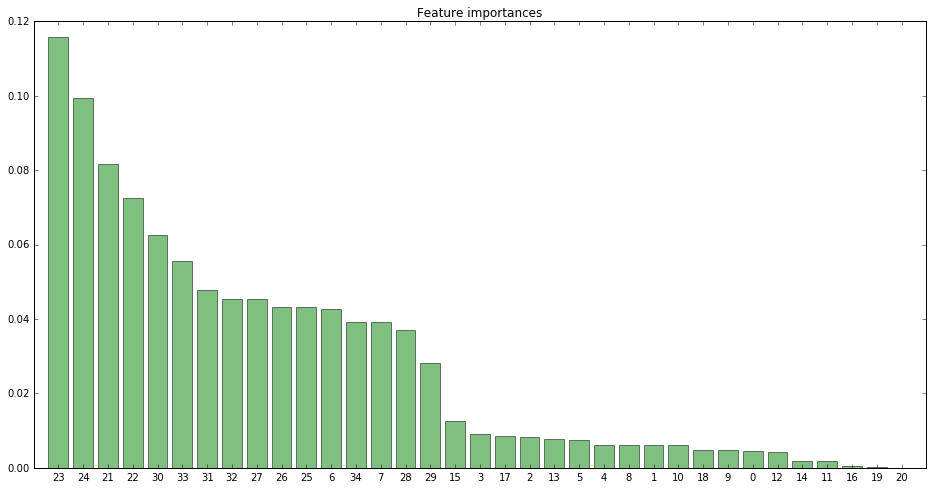

In [30]:
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(train_df.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = (16, 8))
plt.title("Feature importances")
plt.bar(range(train_df.shape[1]), importances[indices], color="g", alpha = 0.5, align="center")
plt.xticks(range(train_df.shape[1]), indices)
plt.xlim([-1, train_df.shape[1]])
plt.show()

The predicted feature importance is roughly the same as that without feature scaling despite of minor difference in weight values.

#### Conclusion: 
For both logistic regression and random forest, a slight Log Loss increase was observed with feature scaling. For logistic regression, feature scaling make the Log Loss from the training and validation data more consistent. Feature scaling has negligible effect on the predicted feature importance from random forest classifier.

### 2. Price Transformation
price --> log(price)

In [34]:
train_df['log_price'] = train_df['price'].apply(np.log)

In [36]:
train_df = train_df.drop(['price'], axis = 1)

In [38]:
x = train_df.values
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size = validation_size, random_state = seed)

Logistic Regression

In [39]:
clf = LogisticRegression(penalty = 'l1', max_iter = 50, C = 10, fit_intercept = True, random_state = seed)
clf.fit(X_train, Y_train)
y_val_pred_prob = clf.predict_proba(X_validation)
log_loss(Y_validation, y_val_pred_prob)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


0.61835944562283085

This Log Loss is slightly higher than 0.6163 using the same parameters but without price transformation.

Random Forest

In [40]:
rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 3, criterion = 'gini', random_state = seed)
rf.fit(X_train, Y_train)
y_val_pred_prob = rf.predict_proba(X_validation)
log_loss(Y_validation, y_val_pred_prob)

0.57389084849634386

The Log Loss is slightly higher than 0.5706 using the same parameters without price transformation.

#### Conclusion:
For both logistic regression and random forest, a slight Log Loss increase was observed with price being replaced by Log(price).

### 3. Multicolinearity

Considering multicollineariy is important in regression analysis because it can mess with your coefficient estimates; small changes in the data used for estimation may cause wild swings in estimated coefficients. Ridge regression (which is a regularization method) is commonly recommended as a tool for dealing with colinearity.  Unlike some penalization methods, it does not put any coefficients to 0 and it shrinks larger coeffiicients by more than small ones (in absolute value).

Machine Learning techniques focus on predictive accuracy, all we care about is how we can use a set of variables to predict another set. We don't care about the impact these variables have on each other. For example, you can imagine that multicollinearity in random forests won’t have any effect on prediction Log Loss or accuracy. If variables are highly correlated, you can simply choose one or the other during the tree split process.
